# Perceptron Learning Algorithm
### Debayan Datta BDA2330027

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv('annotated_points_np_346.csv')
dataset

,x,y,labels
0,2.225703,18.488419,4.0
1,3.609667,16.038292,4.0
2,3.692292,17.845762,4.0
3,1.585362,13.427500,4.0
4,6.625469,8.246084,4.0
...,...,...,...
341,5.324130,23.308341,4.0
342,6.356939,19.894229,4.0
343,8.732399,14.110323,4.0
344,10.777361,9.009238,4.0


In [80]:
dataset.labels[dataset.labels==4] = -1
dataset.labels[dataset.labels==1] = 1

/tmp/ipykernel_108274/2426537674.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset.labels[dataset.labels==4] = -1
/tmp/ipykernel_108274/2426537674.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Yo

In [81]:
dataset[dataset.labels==-1]

,x,y,labels
0,2.225703,18.488419,-1.0
1,3.609667,16.038292,-1.0
2,3.692292,17.845762,-1.0
3,1.585362,13.427500,-1.0
4,6.625469,8.246084,-1.0
...,...,...,...
341,5.324130,23.308341,-1.0
342,6.356939,19.894229,-1.0
343,8.732399,14.110323,-1.0
344,10.777361,9.009238,-1.0


In [82]:
dataset[dataset.labels==1]

,x,y,labels
153,11.768857,26.923283,1.0
154,14.082349,25.075646,1.0
155,13.421352,21.902530,1.0
156,12.533136,24.834650,1.0
157,15.941405,23.469005,1.0
...,...,...,...
316,11.603608,16.520284,1.0
317,10.033738,18.970411,1.0
318,12.058044,13.708662,1.0
319,12.925603,11.700361,1.0


In [83]:
x = np.array(dataset['x'])
y = np.array(dataset['y'])
labels = np.array(dataset['labels'])

print(x.shape)
print(y.shape)

(346,)
(346,)


In [84]:
# Reshape x and y to be 2D arrays with a single column
x_reshaped = x[:, np.newaxis]  # or x.reshape(-1, 1)
y_reshaped = y[:, np.newaxis]  # or y.reshape(-1, 1)

print(x_reshaped.shape)
print(y_reshaped.shape)

(346, 1)
(346, 1)


In [85]:
data = np.concatenate((x_reshaped, y_reshaped), axis=1)
print(data[:5])

[[ 2.22570317 18.4884188 ]
 [ 3.60966709 16.03829161]
 [ 3.6922918  17.84576248]
 [ 1.58536166 13.42750033]
 [ 6.62546907  8.24608381]]


In [86]:
def perceptron_train(x, y, labels, iterations=7500):
    
    x = x.reshape(-1,1)     # converting into column array from row array
    y = y.reshape(-1,1)
    x_train = np.concatenate((x,y), axis=1)
    
    # Initialize weights
    w = np.zeros(x_train.shape[1])
    bias=0
    
    for t in range(iterations):
        misclassified = False
        
        for i in range(len(x_train)):
            if labels[i] * (np.dot(w, x_train[i]) + bias) <= 0:

                w = w + (labels[i] * x_train[i])
                bias = bias + labels[i]
                misclassified = True
                print(w)
        
        if not misclassified:
            return w, bias
    
    return w, bias

    

In [87]:
x_train = np.array(dataset['x'])
y_train = np.array(dataset['y'])
labels = np.array(dataset['labels'])


weights, bias = perceptron_train(x_train, y_train, labels)
print("\n")
print("Learned weights:", weights)
print("Learned bias:", bias)

[ -2.22570317 -18.4884188 ]
[9.5431542 8.4348641]
[ 2.11209419 -9.2502343 ]
[ -9.8220126  -10.54759673]
[ 1.94684477 16.37568617]
[-5.48421524 -1.30941224]
[ 6.28464213 25.61387067]
[-1.14641787  7.92877226]
[ -7.64794987 -11.84495916]
[ 4.12090749 15.07832374]
[-3.31015251 -2.60677467]
[ 8.45870486 24.31650823]
[1.02764485 6.63140983]
[ -5.47388715 -13.1423216 ]
[ 6.29497022 13.78096131]
[-1.13608979 -3.9041371 ]
[10.63276758 23.0191458 ]
[3.20170758 5.3340474 ]
[ -3.29982442 -14.43968403]
[ 8.46903295 12.48359888]
[ 1.03797294 -5.20149953]
[-10.89613385  -6.49886196]
[ 0.87272352 20.42442094]
[-6.55833649  2.73932253]
[-13.05986849 -17.03440889]
[-1.29101112  9.88887401]
[20.39281165 12.75271121]
[12.96175164 -4.9323872 ]
[  5.24150515 -19.88619628]
[ -6.69260165 -21.18355871]
[5.07625572 5.73972419]
[ -2.35480428 -11.94537421]
[ 9.41405309 14.97790869]
[ 1.98299308 -2.70718972]
[-10.48817434  -5.73169099]
[ 1.28068303 21.19159191]
[-6.15037698  3.50649351]
[-12.65190898 -16.26723792

In [88]:
def plot_separation_line(x, y, labels, weights, bias):
    plt.scatter(x, y, c=labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    
    # Plot the separation line
    x_values = np.linspace(min(x), max(x), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    
    plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Learning Algorithm')

    plt.xlim(0, 27) 
    plt.ylim(0, 40) 
    
    plt.show()


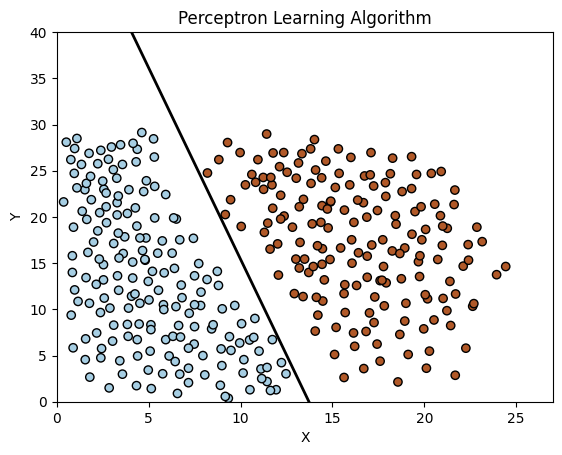

In [89]:
plot_separation_line(x_train, y_train, labels, weights, bias)